# Dataset overview and general cleaning steps for Topic 1 and Topic 2

In [1]:
#importing necessary packages and setting enviornent variable
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
agent_list=['OpenAI_Codex','Copilot','Devin','Cursor','Claude_Code']
pd.set_option('display.max_colwidth', 200)
END_DATE = pd.Timestamp("2025-08-02 00:00:00", tz="UTC")

## Step 0: Importing all the AIDev dataset

In [2]:
all_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_pull_request.parquet")
all_repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_repository.parquet")
all_user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/all_user.parquet")
print('imported')

imported


In [3]:
# Basic
pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
repo_df = pd.read_parquet("hf://datasets/hao-li/AIDev/repository.parquet")
user_df = pd.read_parquet("hf://datasets/hao-li/AIDev/user.parquet")
print('imported')

imported


In [4]:
# Comments and reviews
pr_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_comments.parquet")
pr_reviews_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_review_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_review_comments_v2.parquet",engine="fastparquet")
print('imported')

imported


In [5]:
# Commits
pr_commits_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet",engine="fastparquet")
print('imported')

imported


In [6]:
# Related issues
related_issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")
issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/issue.parquet")
print('imported')

imported


In [7]:
# Events
pr_timeline_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_timeline.parquet")
# Task type
pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_task_type.parquet")
print('imported')

imported


In [8]:
# Human-PR
human_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pull_request.parquet")
human_pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pr_task_type.parquet")
print('imported')

imported


## Step 1: Classifying the main Pull Request Dataset

By studying the all_pr_df dataset, we can see that some of the pull requests have already been closed, but is not merged into the repo, while some of them are neither closed nor merged. 

Therefore, we decided to splitting the dataset into tree subsets:

1. low_quality set: where all the pull requests are closed but not merged
2. neitral_quality set: where all the pull requests are neither closed nor merged
3. high_quality set: where all the pull requests are closed and merged

In [9]:
#Splitting the all_pr_df
low_quality=all_pr_df[all_pr_df['state'].str.contains('closed') & all_pr_df['merged_at'].isna()]
low_agent=Counter(low_quality['agent'])
neutral_quality=all_pr_df[all_pr_df['state'].str.contains('open')]
neutral_agent=Counter(neutral_quality['agent'])
high_quality=all_pr_df[all_pr_df['state'].str.contains('closed') & ~all_pr_df['merged_at'].isna()]
high_agent=Counter(high_quality['agent'])

In [10]:
high_quality.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264016139,1688,`metta code` --> `metta clip` and additional polish,Remove unused `root_key` variable to fix ruff linting error F841\n\n🤖 Generated with [Claude Code](https://claude.ai/code)\n\nCo-Authored-By: Claude <noreply@anthropic.com>\n\n[Asana Task](https:/...,Claude_Code,37011,jacklionheart,closed,2025-07-25T18:15:36Z,2025-07-25T19:17:23Z,2025-07-25T19:17:23Z,8.439884e+08,https://api.github.com/repos/Metta-AI/metta,https://github.com/Metta-AI/metta/pull/1688
4,3264067496,3,🚀 Complete Frontend-Backend API Integration with CORS Resolution,"## 🎯 Summary\n\nThis PR completes the **frontend-backend API integration milestone**, establishing an enterprise-platform level architecture foundation comparable to Salesforce, Workday, and Servi...",Claude_Code,42357482,twitchyvr,closed,2025-07-25T18:39:14Z,2025-07-25T18:48:47Z,2025-07-25T18:48:47Z,1.025871e+09,https://api.github.com/repos/twitchyvr/Spaghetti,https://github.com/twitchyvr/Spaghetti/pull/3
5,3264372403,1,Comprehensive LMSR Markets System with Weekly Assignments and Advanced Infrastructure,"## Summary\n🚀 **Major platform upgrade**: Complete LMSR prediction markets system with automated weekly assignments, real-time updates, hybrid authentication, and comprehensive development infrast...",Claude_Code,62402155,derspotter,closed,2025-07-25T20:59:39Z,2025-07-28T12:01:05Z,2025-07-28T12:01:05Z,9.249577e+08,https://api.github.com/repos/derspotter/intellacc.com,https://github.com/derspotter/intellacc.com/pull/1
6,3264398344,37,"Fix Core Functionality - Search, Shows, Grids, Trending Data, Mobile Optimization",## 🚀 Critical Functionality Fixes Complete\n\nThis PR resolves all major functionality issues identified in the MySetlist app and introduces comprehensive mobile performance and UX optimizations:\...,Claude_Code,215797445,terragon-labs[bot],closed,2025-07-25T21:12:12Z,2025-07-26T21:29:24Z,2025-07-26T21:29:24Z,1.007375e+09,https://api.github.com/repos/swbam/mysetlist-s4,https://github.com/swbam/mysetlist-s4/pull/37
8,3264481903,249,[POS-168] Sistema de Flags para Perfis de Usuários,### **User description**\n## Linear Ticket\nFixes POS-168\n\n## Summary\nImplementa sistema de flags (sinalizações) para categorizar perfis de usuários com indicadores visuais de atenção. Administ...,Claude_Code,13950513,angelod1as,closed,2025-07-25T21:56:42Z,2025-07-25T22:25:37Z,2025-07-25T22:25:37Z,9.744943e+08,https://api.github.com/repos/angelod1as/positiv,https://github.com/angelod1as/positiv/pull/249


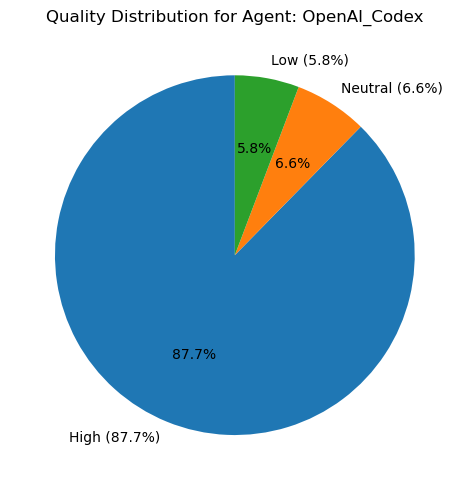

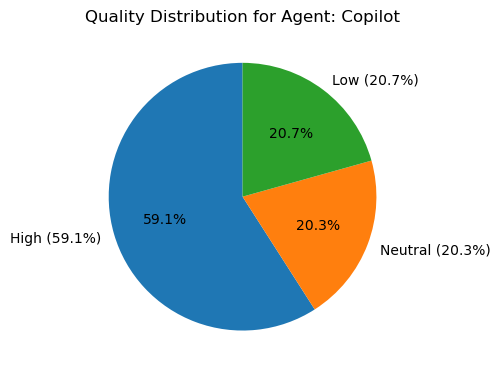

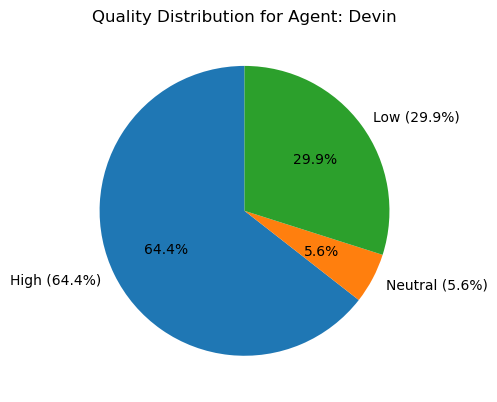

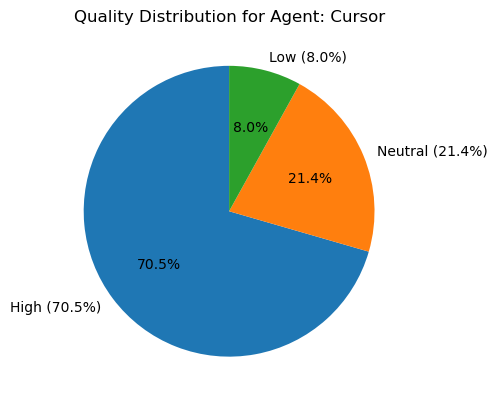

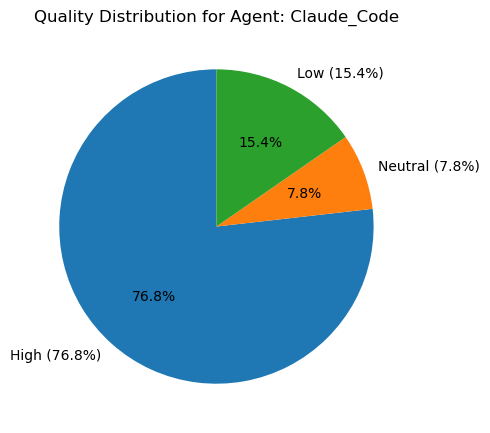

In [11]:
#Showing the propertion of the quality of PRs for each of the agents
for ag in agent_list:
    low = low_agent.get(ag, 0)
    neutral = neutral_agent.get(ag, 0)
    high = high_agent.get(ag, 0)
    total = low + neutral + high
    values = [high, neutral, low]
    labels = ["High", "Neutral", "Low"]
    pct_labels = [f"{l} ({v/total*100:.1f}%)" for l, v in zip(labels, values)]
    plt.figure(figsize=(5,5))
    plt.pie(
        values, 
        labels=pct_labels,
        autopct='%1.1f%%', 
        startangle=90
    )
    plt.title(f"Quality Distribution for Agent: {ag}")
    plt.tight_layout()
    plt.show()

## Step 2: Determine the quality features for the PRs

After evaluating all available datasets, we identified the following variables as key predictors for assessing the additional quality of pull requests (PRs):

1. `turnaround_hours`:
This feature is computed as the time difference between the PR creation timestamp and its closing timestamp. Turnaround hours serve as a proxy for the efficiency with which a task is completed. Shorter turnaround times may indicate higher implementation efficiency, whereas longer durations may suggest increased difficulty, lower quality, or the need for additional refinement.

2. `review_count`:
This feature represents the number of review events associated with each PR, extracted from the `pr_review_counts` dataset. We adopt the assumption that a higher number of review interactions reflects greater required revisions or clarifications. Consequently, a larger review count may be indicative of lower initial PR quality.

Therefore, we will be calculating the quality features for the high quality PR dataset and determine which of these PRs and considered the top among other high quality PRs.

In [13]:
pr_review_counts=Counter(pr_reviews_df['pr_id'])

In [17]:
#estimating the quality of high_quality PR
#getting all the possible predictors for qunality from the datasets
h_main=high_quality[['id','created_at','closed_at','repo_id','agent']].sort_values(by='id')
h_main['review_count']=h_main['id'].map(pr_review_counts)
h_main["created_at"] = pd.to_datetime(h_main["created_at"], utc=True)
h_main["closed_at"] = pd.to_datetime(h_main["closed_at"], utc=True)
h_main['turnaround_hours']=(h_main['closed_at']-h_main['created_at']).dt.total_seconds()/3600
h_main['turnaround_hours']=h_main['turnaround_hours'].round(2)

In [18]:
h_main.head()

,id,created_at,closed_at,repo_id,agent,review_count,turnaround_hours
931060,2757008868,2024-12-24 01:42:40+00:00,2024-12-24 01:50:22+00:00,738289162.0,Devin,0,0.13
931061,2757009257,2024-12-24 01:43:19+00:00,2024-12-24 01:46:49+00:00,798545687.0,Devin,0,0.06
931062,2757012201,2024-12-24 01:48:08+00:00,2024-12-24 01:50:36+00:00,738289162.0,Devin,0,0.04
931063,2757015327,2024-12-24 01:53:05+00:00,2024-12-24 01:53:43+00:00,798545687.0,Devin,0,0.01
931064,2757020690,2024-12-24 02:00:52+00:00,2024-12-24 02:01:34+00:00,798545687.0,Devin,0,0.01


In [19]:
#for the high_quality datset, we are planning to use these two variables to calculate a score
print(h_main['review_count'].describe())
print(h_main['turnaround_hours'].describe())
#the data is extremely skrewed, need to do a data normalization

count    790139.000000
mean          0.026121
std           0.501859
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: review_count, dtype: float64
count    790139.000000
mean          2.750701
std          31.554629
min           0.000000
25%           0.000000
50%           0.010000
75%           0.050000
max        2546.480000
Name: turnaround_hours, dtype: float64


## Step 3: Calculating the score for high quality PRs

After examining the distributions of `review_count` and `turnaround_time` for the low-quality PRs, we observe that more than 75% of these PRs received no reviews, and over 75% of the high-quality PRs were closed within one hour of their creation. These patterns suggest that both features are highly skewed and therefore require normalization before further analysis.

To address this, we transform `review_count` and `turnaround_time` into two normalized scoring factors ranging from 0 to 1. Under this scheme, PRs with a larger number of reviews receive lower `review_norm` scores, and PRs with longer turnaround times receive lower `time_norm` scores.

Finally, we compute a composite quality score for each PR using a weighted sum:


$\text{score} = 60 \times \text{review\_norm} + 40 \times \text{time\_norm}.$


In [38]:
#The standard is that the less time it take ,the less reviews it needs, the better the PR
h_main["review_log"] = np.log1p(h_main["review_count"])
# normalized 0–1
review_max = h_main["review_log"].max()
h_main["review_norm_raw"] = h_main["review_log"] / review_max
# direction reversed for High Quality:
# fewer reviews = higher quality → closer to 1
h_main["review_norm"] = 1 - h_main["review_norm_raw"]
# log scaling
h_main["time_log"] = np.log1p(h_main["turnaround_hours"])
time_max = h_main["time_log"].max()
h_main["time_norm_raw"] = h_main["time_log"] / time_max
# reverse direction: shorter = higher quality
h_main["time_norm"] = 1 - h_main["time_norm_raw"]
h_main["hqs"] = 0.6 * h_main["review_norm"] + 0.4 * h_main["time_norm"]
h_main["Y_quality"] = (h_main["hqs"] * 100).round(2)
h_main[["review_count", "turnaround_hours", "review_norm", "time_norm", "Y_quality",'agent']].sort_values(by='Y_quality')

,review_count,turnaround_hours,review_norm,time_norm,Y_quality,agent
53464,30,1080.51,0.00000,0.109239,4.37,Copilot
6499,30,940.76,0.00000,0.126881,5.08,Copilot
11236,30,918.26,0.00000,0.129964,5.20,Copilot
25898,30,910.66,0.00000,0.131023,5.24,Copilot
83615,27,1192.84,0.02964,0.096639,5.64,OpenAI_Codex
...,...,...,...,...,...,...
645042,0,0.00,1.00000,1.000000,100.00,OpenAI_Codex
284692,0,0.00,1.00000,1.000000,100.00,OpenAI_Codex
665226,0,0.00,1.00000,1.000000,100.00,OpenAI_Codex
645043,0,0.00,1.00000,1.000000,100.00,OpenAI_Codex


## Step 4: Extracting additional features for PRs

In order to determine what influences the quality of the PRs, that is, their turnaround time and review count, we decided to explore all the possible features of the PRs.

#### Step: 4.1: Exploring the pr_commit_details_df

After reviewing the dataset, we selected the following features for extraction: total additions, total deletions, total changes, status and file type.

In [23]:
pr_commit_details_df.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model documentation\n\n- Create docs/compile_llms_txt.py script to compile all documentation\n- Add GitHub Actions workflow to auto-update llms.txt on doc ch...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n+on:\n+ push:\n+ branches: [ main ]\n+ paths:\n+ - 'docs/**'\n+ - 'README.md'\n+ - 'CONTRIBUTING.md'\n+ - 'examples/*/READM..."
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model documentation\n\n- Create docs/compile_llms_txt.py script to compile all documentation\n- Add GitHub Actions workflow to auto-update llms.txt on doc ch...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib import Path\n+\n+def compile_llms_txt():\n+ """"""Compile all relevant documentation into llms.txt for AI model consumption.""""""\n+ current_dir = Path..."
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model documentation\n\n- Create docs/compile_llms_txt.py script to compile all documentation\n- Add GitHub Actions workflow to auto-update llms.txt on doc ch...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and apply formatting\n\n- Remove unused current_dir variable to fix F841 error\n- Apply ruff formatting changes for consistent code style\n\nCo-Authored-By:...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib import Path\n \n+\n def compile_llms_txt():\n """"""Compile all relevant documentation into llms.txt for AI model consumption.""""""\n- current_dir = ..."
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard with structured links instead of full content\n\nCo-Authored-By: Pratyush Shukla <pratyush@agentops.ai>,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt():\n- """"""Compile all relevant documentation into llms.txt for AI model consumption.""""""\n- content = """"\n-\n- # Define names of directories a..."


In [24]:
# getting the file type from the filename
pr_commit_details_df["file_ext"] = (
    pr_commit_details_df["filename"]
    .str.split(".").str[-1]
    .str.lower()
)
# getting the new subset commit_detail
commit_detail=pr_commit_details_df[['sha','pr_id','status','changes','additions','deletions','file_ext']]

In [25]:
commit_detail.head()

,sha,pr_id,status,changes,additions,deletions,file_ext
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,added,38.0,38.0,0.0,yml
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,added,47.0,47.0,0.0,py
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,added,22923.0,22923.0,0.0,txt
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,modified,35.0,18.0,17.0,py
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,modified,87.0,51.0,36.0,py


#### Step 4.2: Additional Feature Engineering from the `commit_detail` Dataset

We extract three groups of PR-level features from the `commit_detail` dataset:

1. **Commit Count**:  
   The number of unique commits per PR, computed using distinct commit SHAs.

2. **Change Statistics**:  
   For each PR, we calculate the maximum, total, and average number of file changes across its commits.

3. **Additions and Deletions**:  
   We compute the total lines added and total lines deleted for each PR.

All features are merged into a unified table, `pr_commit_features`, indexed by `pr_id`.

In [28]:
commit_count = (
    commit_detail.groupby("pr_id")["sha"]
    .nunique()
    .rename("commit_count")
)
change_stats = commit_detail.groupby("pr_id").agg(
    max_change=("changes", "max"),
    total_change=("changes", "sum"),
    avg_change=("changes", "mean"),
)
add_del_stats = commit_detail.groupby("pr_id").agg(
    total_additions=("additions", "sum"),
    total_deletions=("deletions", "sum")
)
pr_commit_features = (
    commit_count
    .to_frame()
    .merge(change_stats, on="pr_id", how="left")
    .merge(add_del_stats, on="pr_id", how="left")
)

In [29]:
pr_commit_features.head()

,commit_count,max_change,total_change,avg_change,total_additions,total_deletions
pr_id,,,,,,
2756921963,16,128.0,1192.0,16.108108,848.0,344.0
2757103560,10,152.0,779.0,23.606061,517.0,262.0
2757124156,1,2.0,2.0,2.000000,1.0,1.0
2757125491,1,2.0,2.0,2.000000,1.0,1.0
2757179026,6,450.0,1802.0,85.809524,1633.0,169.0


#### Step 4.3: Extracting features from the pr_task_type_df

We then exact the job type for each PR request.

In [26]:
task=pr_task_type_df[['id','type']]

In [27]:
task.head()

,id,type
0,3264933329,fix
1,3265709660,feat
2,3265782173,chore
3,3231949586,feat
4,3231950376,feat


#### Step 4.4: Extracting features from repo_df

We exact the repo id, stars, forks and language from the repo_df dataset for future use.

In [32]:
repo_features = repo_df[["id", "stars","forks","language"]]

In [34]:
repo_features.head()

,id,stars,forks,language
0,966235850,254,11,TypeScript
1,386644013,2391,94,Rust
2,977155585,1447,474,Python
3,528194129,142,34,Smarty
4,703998226,515,32,Rust


## Step 5: Merging and grouping features for the high_quality dataset

In [45]:
y_x_table=h_main.merge(task,on='id',how='left').merge(pr_commit_features,left_on='id',right_on='pr_id',how='left').merge(repo_features,left_on='repo_id',right_on='id',how='left')
y_x_table

,id_x,created_at,closed_at,repo_id,agent,review_count,turnaround_hours,review_log,review_norm_raw,review_norm,...,commit_count,max_change,total_change,avg_change,total_additions,total_deletions,id_y,stars,forks,language
0,2757008868,2024-12-24 01:42:40+00:00,2024-12-24 01:50:22+00:00,7.382892e+08,Devin,0,0.13,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2757009257,2024-12-24 01:43:19+00:00,2024-12-24 01:46:49+00:00,7.985457e+08,Devin,0,0.06,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2757012201,2024-12-24 01:48:08+00:00,2024-12-24 01:50:36+00:00,7.382892e+08,Devin,0,0.04,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2757015327,2024-12-24 01:53:05+00:00,2024-12-24 01:53:43+00:00,7.985457e+08,Devin,0,0.01,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2757020690,2024-12-24 02:00:52+00:00,2024-12-24 02:01:34+00:00,7.985457e+08,Devin,0,0.01,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790134,3278261877,2025-07-30 19:48:03+00:00,2025-07-30 19:48:34+00:00,1.029169e+09,OpenAI_Codex,0,0.01,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790135,3278262225,2025-07-30 19:48:12+00:00,2025-07-30 19:49:07+00:00,1.026299e+09,OpenAI_Codex,0,0.02,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790136,3278262823,2025-07-30 19:48:28+00:00,2025-07-30 19:49:43+00:00,1.028331e+09,OpenAI_Codex,0,0.02,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790137,3278263267,2025-07-30 19:48:40+00:00,2025-07-30 19:48:47+00:00,1.029126e+09,OpenAI_Codex,0,0.00,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> ⚠️ **Important Note**  
> We observe that a substantial portion of PRs have a commit count of zero.  
> Although these PRs were successfully merged, they introduced no code changes and contributed nothing to the repository.  
> Therefore, these PRs should not be considered high-quality contributions and should instead be treated as low-quality PRs.
>
> We will do one more filtering of the dataset, deleting all the PRs without commit count and fill the other NaN with 0.

In [44]:
final=y_x_table[y_x_table['commit_count'].notna()].copy().fillna(0)
final

,id_x,created_at,closed_at,repo_id,agent,review_count,turnaround_hours,review_log,review_norm_raw,review_norm,...,commit_count,max_change,total_change,avg_change,total_additions,total_deletions,id_y,stars,forks,language
37,2757674020,2024-12-24 11:56:28+00:00,2024-12-24 12:28:56+00:00,689765175.0,Devin,0,0.54,0.0,0.0,1.0,...,6.0,1050.0,2493.0,95.884615,1646.0,847.0,689765175.0,696.0,117.0,TypeScript
55,2758172742,2024-12-24 17:57:41+00:00,2024-12-24 19:51:08+00:00,689765175.0,Devin,0,1.89,0.0,0.0,1.0,...,2.0,128.0,528.0,58.666667,515.0,13.0,689765175.0,696.0,117.0,TypeScript
61,2758215458,2024-12-24 19:11:10+00:00,2024-12-24 19:59:32+00:00,883825890.0,Devin,0,0.81,0.0,0.0,1.0,...,6.0,199.0,870.0,58.000000,433.0,437.0,883825890.0,116.0,17.0,Solidity
73,2758578416,2024-12-25 07:25:56+00:00,2024-12-25 07:28:26+00:00,689765175.0,Devin,0,0.04,0.0,0.0,1.0,...,2.0,72.0,208.0,41.600000,197.0,11.0,689765175.0,696.0,117.0,TypeScript
75,2758595312,2024-12-25 07:51:01+00:00,2024-12-25 08:42:23+00:00,689765175.0,Devin,0,0.86,0.0,0.0,1.0,...,6.0,265.0,624.0,48.000000,541.0,83.0,689765175.0,696.0,117.0,TypeScript
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789503,3278088521,2025-07-30 18:32:13+00:00,2025-07-30 18:32:36+00:00,233712297.0,OpenAI_Codex,0,0.01,0.0,0.0,1.0,...,1.0,44.0,44.0,44.000000,26.0,18.0,233712297.0,404.0,76.0,C++
789511,3278090865,2025-07-30 18:33:17+00:00,2025-07-30 18:34:14+00:00,233712297.0,OpenAI_Codex,0,0.02,0.0,0.0,1.0,...,2.0,77.0,117.0,39.000000,70.0,47.0,233712297.0,404.0,76.0,C++
789595,3278111128,2025-07-30 18:41:56+00:00,2025-07-30 18:43:39+00:00,922805069.0,OpenAI_Codex,0,0.03,0.0,0.0,1.0,...,1.0,43.0,43.0,43.000000,17.0,26.0,922805069.0,251.0,58.0,Python
789619,3278116754,2025-07-30 18:44:34+00:00,2025-07-30 18:44:46+00:00,233712297.0,OpenAI_Codex,0,0.00,0.0,0.0,1.0,...,1.0,15.0,15.0,15.000000,9.0,6.0,233712297.0,404.0,76.0,C++


This leave us only 24014 rows of cleaned data, we will export the data for the analysis of Topic 1.

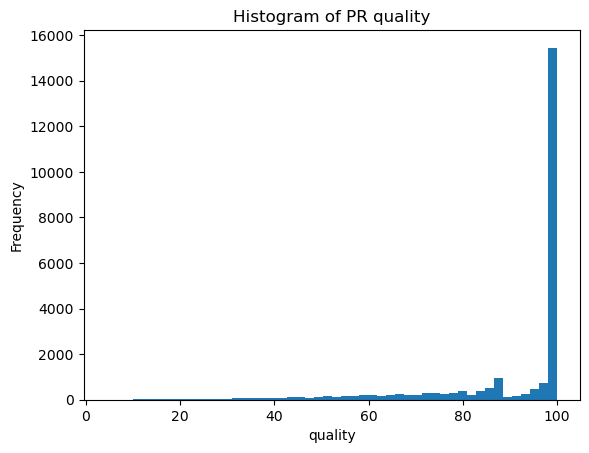

In [42]:
#Showing a histogram for the score of the final data.
plt.hist(final['Y_quality'], bins=50)
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.title('Histogram of PR quality')
plt.show()

## Step 6: Exporting the quality.csv file for Topic 1

In [64]:
#This is the cleaned dataset for topic 1
final.to_csv("quality.csv", index=False, encoding="utf-8")

## Step 7: Extracting all the low quality PRs

From the study of step 5, we find out that the number of PRs that are truely of low quality are higher than expected. In order to get all the PRs that are low quality, we have to find all the PRs that have the following featrues:

1. The PR has an available `closed_at` value and a NaN `merged_at` value

or

2. The PR has an available `closed_at` value and an available `merged_at` value, but has no commit_count value

In [57]:
# We first retrieve all the low and quality PRs
combined = pd.concat([low_quality, high_quality], ignore_index=True)
combined.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264042289,1600,Add Evals frontend implementation plan and HTML prototype,"\nCreate comprehensive implementation plan for the Evals evaluation platform frontend,\ntransforming the existing HTML prototype into a production-ready React application\nusing the BfDs design sy...",Claude_Code,6766889,justicart,closed,2025-07-25T18:26:15Z,2025-07-25T23:19:14Z,None,926711750.0,https://api.github.com/repos/bolt-foundry/bolt-foundry,https://github.com/bolt-foundry/bolt-foundry/pull/1600
1,3264042318,1601,Add 4 new BfDs components for Evals interface implementation,"\nPhase 1 component creation for the Evals frontend:\n\n- BfDsModal: Full-featured modal with focus management, animations, size variants\n- BfDsEmptyState: Empty state component with actions and ...",Claude_Code,6766889,justicart,closed,2025-07-25T18:26:16Z,2025-07-25T23:19:11Z,None,926711750.0,https://api.github.com/repos/bolt-foundry/bolt-foundry,https://github.com/bolt-foundry/bolt-foundry/pull/1601
2,3264428170,464,🚀 Complete 64-Agent System Implementation,"# 🚀 Complete 64-Agent System Implementation\n\n## ✨ Overview\nThis PR introduces a comprehensive **64-agent system** for Claude-Flow v2 Alpha, enabling enterprise-grade AI orchestration through in...",Claude_Code,2934394,ruvnet,closed,2025-07-25T21:26:37Z,2025-07-25T21:29:18Z,None,995029641.0,https://api.github.com/repos/ruvnet/claude-flow,https://github.com/ruvnet/claude-flow/pull/464
3,3264796443,1609,Move codebot workspace storage to ./tmp/codebot-workspaces,\nRelocate container workspace management from .bft/container/ to ./tmp/codebot-workspaces/\nfor cleaner directory organization and better separation of concerns.\n\nChanges:\n- Update codebot.bft...,Claude_Code,448694,randallb,closed,2025-07-26T01:07:32Z,2025-07-26T21:47:32Z,None,926711750.0,https://api.github.com/repos/bolt-foundry/bolt-foundry,https://github.com/bolt-foundry/bolt-foundry/pull/1609
4,3264933329,2911,Fix: Wait for all partitions in load_collection when some are still loading,"## Summary\n\nFixes an issue where `load_collection` would return success when collection progress reached 100%, even if individual partitions were still loading after being released and reloaded....",Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505.0,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911


In [58]:
#Filter all the PRs and dropping useless columns
true_failure = combined[~combined['id'].isin(final['id_x'])]
true_failure=true_failure.drop(columns=['number','body','user_id','user','repo_url','html_url','title'])
true_failure["created_at"] = pd.to_datetime(true_failure["created_at"], utc=True)
true_failure["closed_at"] = pd.to_datetime(true_failure["closed_at"], utc=True)
true_failure['turnaround_hours']=(true_failure['closed_at']-true_failure['created_at']).dt.total_seconds()/3600
true_failure['turnaround_hours']=true_failure['turnaround_hours'].round(2)
true_failure['review_count']=true_failure['id'].map(pr_review_counts)
true_failure.head()

,id,agent,state,created_at,closed_at,merged_at,repo_id,turnaround_hours,review_count
0,3264042289,Claude_Code,closed,2025-07-25 18:26:15+00:00,2025-07-25 23:19:14+00:00,None,926711750.0,4.88,0
1,3264042318,Claude_Code,closed,2025-07-25 18:26:16+00:00,2025-07-25 23:19:11+00:00,None,926711750.0,4.88,0
2,3264428170,Claude_Code,closed,2025-07-25 21:26:37+00:00,2025-07-25 21:29:18+00:00,None,995029641.0,0.04,0
3,3264796443,Claude_Code,closed,2025-07-26 01:07:32+00:00,2025-07-26 21:47:32+00:00,None,926711750.0,20.67,0
4,3264933329,Claude_Code,closed,2025-07-26 02:59:01+00:00,2025-07-29 07:01:20+00:00,None,191751505.0,76.04,0


## Step 8: Merging and grouping features for true_failure dataset

In [59]:
# merging with pr_commit_features and repo_features
true_failure=true_failure.merge(task,on='id',how='left').merge(pr_commit_features,left_on='id',right_on='pr_id',how='left').merge(repo_features,left_on='repo_id',right_on='id',how='left')

In [61]:
result = pd.concat({
    "true_failure_count": true_failure.count(),
    "id_y_isna_count": true_failure[true_failure['id_y'].isna()].count()
}, axis=1)

result

,true_failure_count,id_y_isna_count
id_x,835913,828590
agent,835913,828590
state,835913,828590
created_at,835913,828590
closed_at,835913,828590
merged_at,766125,766083
repo_id,833582,826259
turnaround_hours,835913,828590
review_count,835913,828590
type,7270,0


> ⚠️ **Important Note**
> 
> The analysis suggests that the `commit_detail` data was likely collected directly from each repository.  
> This means that if a repository was not properly connected or accessible, the commit history of a PR—despite being successfully merged—would not be recorded. As a result, we cannot determine what changes were committed or how the AI contributed to those PRs.
>
> In the `true_failure` dataset, only **7,323 PRs** contain a valid `repo_id`.  
> This implies that many PRs with valid `closed_at` and `merged_at` timestamps but missing `commit_count` may actually have commit records that were simply not captured due to missing repository links.
>
> Although Step 5 identifies some “fake” high-quality PRs, most of these cases arise from **insufficient feature information** rather than meaningful contributions. Such PRs are therefore **not suitable for quality evaluation** and should be excluded from further analysis.
>
> Therefore, we will filter the corrupted 800k PRs from the dataset.

In [62]:
true_failure[['commit_count','max_change','total_change','total_additions','total_deletions','avg_change']]=true_failure[['commit_count','max_change','total_change','total_additions','total_deletions','avg_change']].fillna(0)
#True value
true_failure.head()

,id_x,agent,state,created_at,closed_at,merged_at,repo_id,turnaround_hours,review_count,type,commit_count,max_change,total_change,avg_change,total_additions,total_deletions,id_y,stars,forks,language
0,3264042289,Claude_Code,closed,2025-07-25 18:26:15+00:00,2025-07-25 23:19:14+00:00,None,926711750.0,4.88,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,3264042318,Claude_Code,closed,2025-07-25 18:26:16+00:00,2025-07-25 23:19:11+00:00,None,926711750.0,4.88,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3264428170,Claude_Code,closed,2025-07-25 21:26:37+00:00,2025-07-25 21:29:18+00:00,None,995029641.0,0.04,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,995029641.0,4630.0,617.0,TypeScript
3,3264796443,Claude_Code,closed,2025-07-26 01:07:32+00:00,2025-07-26 21:47:32+00:00,None,926711750.0,20.67,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,3264933329,Claude_Code,closed,2025-07-26 02:59:01+00:00,2025-07-29 07:01:20+00:00,None,191751505.0,76.04,0,fix,1.0,343.0,396.0,132.0,394.0,2.0,191751505.0,1230.0,368.0,Python


## Step 9: Exporting the failed.csv file for Topic 2

In [63]:
true_failure=true_failure[true_failure['id_y'].notna()]
true_failure=true_failure.drop(columns=['id_y'])
true_failure.to_csv("failed.csv", index=False, encoding="utf-8")
true_failure

,id_x,agent,state,created_at,closed_at,merged_at,repo_id,turnaround_hours,review_count,type,commit_count,max_change,total_change,avg_change,total_additions,total_deletions,stars,forks,language
2,3264428170,Claude_Code,closed,2025-07-25 21:26:37+00:00,2025-07-25 21:29:18+00:00,None,9.950296e+08,0.04,0,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,4630.0,617.0,TypeScript
4,3264933329,Claude_Code,closed,2025-07-26 02:59:01+00:00,2025-07-29 07:01:20+00:00,None,1.917515e+08,76.04,0,fix,1.0,343.0,396.0,132.000000,394.0,2.0,1230.0,368.0,Python
27,3234102722,Claude_Code,closed,2025-07-16 01:00:34+00:00,2025-07-17 12:49:29+00:00,None,9.950296e+08,35.82,0,chore,5.0,888.0,15711.0,89.777143,13214.0,2497.0,4630.0,617.0,TypeScript
30,3212961701,Claude_Code,closed,2025-07-08 15:26:38+00:00,2025-07-08 15:27:58+00:00,None,1.009254e+09,0.02,0,fix,2.0,14692.0,22020.0,179.024390,20716.0,1304.0,205.0,77.0,Rust
46,3164503419,Claude_Code,closed,2025-06-20 22:47:18+00:00,2025-06-21 11:51:22+00:00,None,1.002552e+09,13.07,2,fix,2.0,749.0,1585.0,132.083333,1445.0,140.0,1691.0,106.0,TypeScript
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96059,3090984912,Copilot,closed,2025-05-26 12:06:07+00:00,2025-05-26 14:07:48+00:00,2025-05-26T14:07:48Z,2.876556e+08,2.03,0,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,340.0,85.0,Python
98283,3210294811,Copilot,closed,2025-07-07 21:27:53+00:00,2025-07-07 21:42:15+00:00,2025-07-07T21:42:15Z,1.705922e+08,0.24,0,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,122.0,208.0,C#
99129,3114197093,Copilot,closed,2025-06-03 14:20:49+00:00,2025-06-03 14:23:02+00:00,2025-06-03T14:23:02Z,1.509601e+08,0.04,0,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,106.0,53.0,TypeScript
99136,3114307467,Copilot,closed,2025-06-03 14:48:10+00:00,2025-06-03 14:49:20+00:00,2025-06-03T14:49:20Z,1.509601e+08,0.02,0,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,106.0,53.0,TypeScript


## Conclusion

So far, we have successfully cleaned and constructed the datasets required for Topic 1 and Topic 2:

1. **`quality.csv`** contains all truly successful and validly merged PRs, each assigned a quality scoring factor `Y_quality`.
2. **`failed.csv`** includes all PRs that were closed without merging possing a valid `repo_id`, as well as merged PRs that have no recorded commit activity but possess a valid `repo_id`.

These processed datasets provide a reliable foundation for subsequent analysis.  
Please refer to the Topic 1 and Topic 2 Jupyter Notebook files for detailed methodological steps, visualizations, and further evaluation.